In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# remove id col
df = df.iloc[:, 1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] !=0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


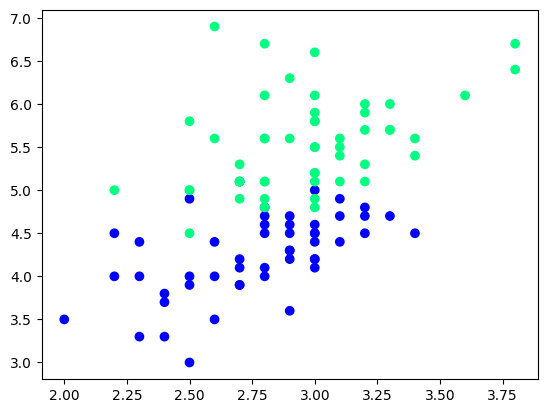

In [12]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'], c=df['Species'],cmap='winter')
plt.show()

In [13]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:90,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [14]:
df_train

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
100,3.3,6.0,2
128,2.8,5.6,2
111,2.7,5.3,2
74,2.9,4.3,1
77,3.0,5.0,1
136,3.4,5.6,2
124,3.3,5.7,2
147,3.0,5.2,2
61,3.0,4.2,1


In [15]:
df_test

,SepalWidthCm,PetalLengthCm,Species
90,2.6,4.4,1
85,3.4,4.5,1
102,3.0,5.9,2
56,3.3,4.7,1
119,2.2,5.0,2


In [16]:
df_val

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
84,3.0,4.5,1
55,2.8,4.5,1
118,2.6,6.9,2
72,2.5,4.9,1


In [17]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [18]:
X_test

array([[3.1, 5.4],
       [3. , 4.5],
       [2.8, 4.5],
       [2.6, 6.9],
       [2.5, 4.9]])

In [19]:
y_test

array([2, 1, 1, 2, 1])

# case - 1 Bagging

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
128,2.8,5.6,2
124,3.3,5.7,2
111,2.7,5.3,2
100,3.3,6.0,2
136,3.4,5.6,2
76,2.8,4.8,1
100,3.3,6.0,2
100,3.3,6.0,2


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [28]:
dt_bag1 = DecisionTreeClassifier()

In [46]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return np.round(scores.mean(), 2)

In [51]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X, y)

np.float64(1.0)

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
77,3.0,5.0,1
74,2.9,4.3,1
76,2.8,4.8,1
76,2.8,4.8,1
147,3.0,5.2,2
124,3.3,5.7,2
61,3.0,4.2,1
147,3.0,5.2,2


In [52]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

np.float64(1.0)

In [32]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag


,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
76,2.8,4.8,1
100,3.3,6.0,2
136,3.4,5.6,2
128,2.8,5.6,2
124,3.3,5.7,2
61,3.0,4.2,1
111,2.7,5.3,2


In [53]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

np.float64(1.0)

In [34]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [35]:
df_test

,SepalWidthCm,PetalLengthCm,Species
90,2.6,4.4,1
85,3.4,4.5,1
102,3.0,5.9,2
56,3.3,4.7,1
119,2.2,5.0,2


In [55]:
dt_bag1.fit(X, y)
dt_bag2.fit(X, y)
dt_bag3.fit(X, y)

print("Predictor 1", dt_bag1.predict(np.array([2.2, 5.0]).reshape(1, 2)))
print("Predictor 2", dt_bag2.predict(np.array([2.2, 5.0]).reshape(1, 2)))
print("Predictor 3", dt_bag3.predict(np.array([2.2, 5.0]).reshape(1, 2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


In [37]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
100,3.3,6.0,2
128,2.8,5.6,2
111,2.7,5.3,2
74,2.9,4.3,1
77,3.0,5.0,1
136,3.4,5.6,2
124,3.3,5.7,2
147,3.0,5.2,2
61,3.0,4.2,1


In [38]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
77,3.0,5.0,1
74,2.9,4.3,1
147,3.0,5.2,2
128,2.8,5.6,2
76,2.8,4.8,1
124,3.3,5.7,2
111,2.7,5.3,2


In [39]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [40]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
7,8,5.0,3.4,1.5,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [41]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,SepalWidthCm
7,1.5,3.4
128,5.6,2.8
125,6.0,3.2
50,4.7,3.2
0,1.4,3.5
96,4.2,2.9
38,1.3,3.0
54,4.6,2.8
105,6.6,3.0
102,5.9,3.0


In [42]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
7,8,5.0,3.4,1.5,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [43]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalLengthCm,SepalWidthCm
96,4.2,2.9
50,4.7,3.2
7,1.5,3.4
125,6.0,3.2
0,1.4,3.5
96,4.2,2.9
105,6.6,3.0
0,1.4,3.5
